### Indian Institute of Information Technology Raichur

**Name:** K. V. Jaya Harsha  
**Roll No:** CS23B1034  
**Course:** Deep Learning for Medical Imaging  

---

#### Project 2: White Blood Cell Segmentation  
##### A Comparative Study of K-Means vs Fuzzy C-Means  

**Task:** Segment White Blood Cell (WBC) nucleus and cytoplasm  

**Methods:** K-Means clustering vs Fuzzy C-Means (FCM) clustering  

**Dataset:** Kaggle — Blood Cell Images  

**Compare:** Boundary accuracy of segmentation  

**Learning:** Hard clustering (K-Means) vs Soft clustering (Fuzzy C-Means)


Import Required Libraries

In [1]:
# Cell 1: Import required libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from sklearn.cluster import KMeans

# For Fuzzy C-Means
!pip install scikit-fuzzy

import skfuzzy as fuzz

# Evaluation metrics
from sklearn.metrics import jaccard_score

# Display settings
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['image.cmap'] = 'gray'

print("Libraries imported successfully.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.4 MB/s eta 0:00:00
Libraries imported successfully.


2. Download Dataset

In [2]:
# Cell 2: Download Blood Cell Dataset from Kaggle

import kagglehub
import os

# Download dataset
dataset_path = kagglehub.dataset_download("paultimothymooney/blood-cells")

print("Dataset downloaded to:", dataset_path)

# List top-level folders
print("\nTop-level contents:")
print(os.listdir(dataset_path))


100%|██████████| 108M/108M [00:00<00:00, 211MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/paultimothymooney/blood-cells/versions/6

Top-level contents:
['dataset2-master', 'dataset-master']


3. Explore Folder Structure

In [3]:
# Cell 3: Explore dataset folder structure

def explore_folder(path, level=0):
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(path)}/")

    try:
        items = os.listdir(path)
    except:
        return

    for item in items[:10]:  # limit to first 10 items
        item_path = os.path.join(path, item)

        if os.path.isdir(item_path):
            explore_folder(item_path, level+1)
        else:
            print(f"{indent}    {item}")

# Explore dataset-master
print("Exploring dataset-master:\n")
explore_folder(os.path.join(dataset_path, "dataset-master"))

print("\n\nExploring dataset2-master:\n")
explore_folder(os.path.join(dataset_path, "dataset2-master"))


Exploring dataset-master:

dataset-master/
    dataset-master/
        labels.csv
        JPEGImages/
            BloodImage_00377.jpg
            BloodImage_00079.jpg
            BloodImage_00219.jpg
            BloodImage_00344.jpg
            BloodImage_00041.jpg
            BloodImage_00081.jpg
            BloodImage_00123.jpg
            BloodImage_00125.jpg
            BloodImage_00092.jpg
            BloodImage_00101.jpg
        Annotations/
            BloodImage_00255.xml
            BloodImage_00352.xml
            BloodImage_00263.xml
            BloodImage_00088.xml
            BloodImage_00043.xml
            BloodImage_00332.xml
            BloodImage_00210.xml
            BloodImage_00273.xml
            BloodImage_00290.xml
            BloodImage_00405.xml


Exploring dataset2-master:

dataset2-master/
    dataset2-master/
        labels.csv
        images/
            TRAIN/
                EOSINOPHIL/
                    _67_5130.jpeg
                    _45_5646.jpeg

4. Load One Sample WBC Image Automatically

Total images in NEUTROPHIL: 2499
Selected image: /root/.cache/kagglehub/datasets/paultimothymooney/blood-cells/versions/6/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/_111_7751.jpeg


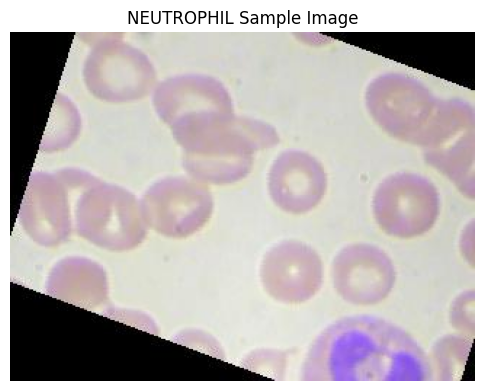

In [4]:
# Cell 4: Load one sample WBC image automatically

# Base path to TRAIN images
train_path = os.path.join(dataset_path, "dataset2-master", "dataset2-master", "images", "TRAIN")

# Choose one WBC class
wbc_class = "NEUTROPHIL"

class_path = os.path.join(train_path, wbc_class)

# Get image list
image_files = os.listdir(class_path)

print(f"Total images in {wbc_class}:", len(image_files))

# Select first image
image_name = image_files[0]

image_path = os.path.join(class_path, image_name)

print("Selected image:", image_path)

# Load image
image = cv2.imread(image_path)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display
plt.imshow(image_rgb)
plt.title(f"{wbc_class} Sample Image")
plt.axis('off')
plt.show()


5. Convert Image to Feature Matrix

In [5]:
# Cell 5: Convert image to feature vector for clustering

# Get image dimensions
h, w, c = image_rgb.shape

print("Image shape:", image_rgb.shape)
print("Height:", h, "Width:", w, "Channels:", c)

# Reshape image into 2D array (pixels × features)
# Each pixel becomes a row with RGB values
pixel_values = image_rgb.reshape((-1, 3))

# Convert to float for clustering
pixel_values = np.float32(pixel_values)

print("Feature matrix shape:", pixel_values.shape)


Image shape: (240, 320, 3)
Height: 240 Width: 320 Channels: 3
Feature matrix shape: (76800, 3)


6. Apply K-Means Clustering

In [6]:
# Cell 6: Apply K-Means clustering

# Number of clusters
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit and predict clusters
kmeans_labels = kmeans.fit_predict(pixel_values)

print("K-Means clustering completed.")

# Get cluster centers
centers = kmeans.cluster_centers_

print("Cluster centers:")
print(centers)


K-Means clustering completed.
Cluster centers:
[[193.62802    169.55856    185.2569    ]
 [  0.9250488    0.6816559    0.75146484]
 [217.6997     216.23782    207.63452   ]]


7. Create Segmented Image from K-Means

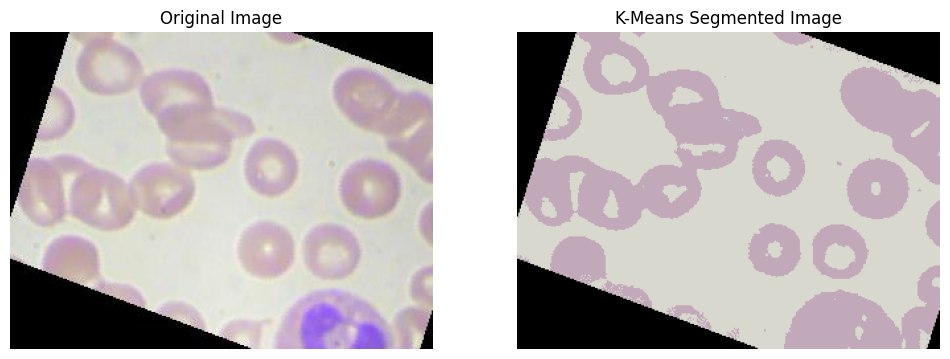

In [7]:
# Cell 7: Convert K-Means result to segmented image

# Replace each pixel value with its cluster center
segmented_pixels = centers[kmeans_labels]

# Convert back to uint8 format
segmented_pixels = np.uint8(segmented_pixels)

# Reshape back to original image shape
segmented_image_kmeans = segmented_pixels.reshape(image_rgb.shape)

# Display results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image_kmeans)
plt.title("K-Means Segmented Image")
plt.axis('off')

plt.show()


8A. Remove black background pixels

In [11]:
# Define threshold for black detection
threshold = 15

# Create mask where pixels are NOT black
non_black_mask = np.any(image_rgb > threshold, axis=2)

# Apply mask to feature matrix
pixel_values_filtered = image_rgb[non_black_mask]

# Reshape to (-1,3)
pixel_values_filtered = pixel_values_filtered.reshape(-1,3)

print("Original pixels:", pixel_values.shape)
print("Filtered pixels:", pixel_values_filtered.shape)


Original pixels: (76800, 3)
Filtered pixels: (65153, 3)


8B. K-Means Segmentation Without Black Background Artifact

In [12]:
# Cell 8B: Apply K-Means on filtered pixels

k = 3

kmeans_filtered = KMeans(n_clusters=k, random_state=42, n_init=10)

filtered_labels = kmeans_filtered.fit_predict(pixel_values_filtered)

filtered_centers = kmeans_filtered.cluster_centers_

print("K-Means applied on filtered pixels.")


K-Means applied on filtered pixels.


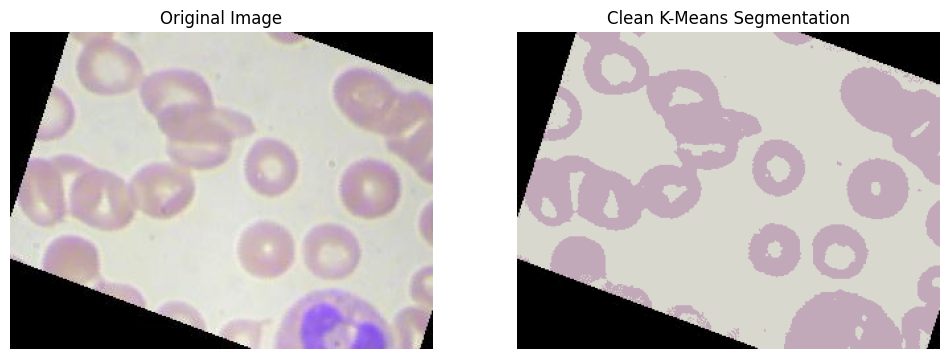

In [13]:
# Reconstruct full label image

# Create empty label image
full_labels = np.full((h, w), -1)

# Assign cluster labels only to non-black pixels
full_labels[non_black_mask] = filtered_labels

# Create segmented image initialized as black
segmented_image_clean = np.zeros((h, w, 3), dtype=np.uint8)

# Fill clustered pixels
segmented_image_clean[non_black_mask] = filtered_centers[filtered_labels]

# Display result
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image_clean)
plt.title("Clean K-Means Segmentation")
plt.axis('off')

plt.show()


9. Apply Fuzzy C-Means Clustering

In [14]:
# Cell 9: Apply Fuzzy C-Means clustering

# Prepare data (transpose required for FCM)
data = pixel_values_filtered.T   # shape becomes (3, N)

# Number of clusters
n_clusters = 3

# Apply FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data,
    c=n_clusters,
    m=2,              # fuzziness parameter
    error=0.005,
    maxiter=1000,
    init=None
)

print("Fuzzy C-Means completed.")

print("Cluster centers:")
print(cntr)

print("FPC (Fuzzy Partition Coefficient):", fpc)


Fuzzy C-Means completed.
Cluster centers:
[[201.65423693 182.67810147 190.44058621]
 [188.00302625 162.03915273 177.29836549]
 [218.30736084 217.73560479 208.85866052]]
FPC (Fuzzy Partition Coefficient): 0.7471506991118292


10 — Create Segmented Image from Fuzzy C-Means

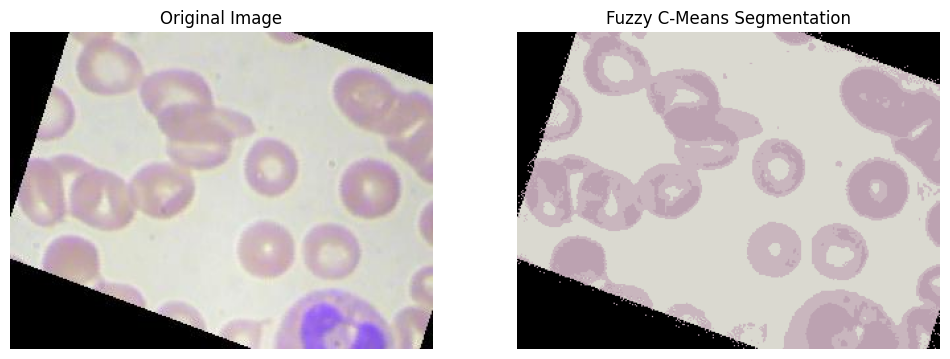

In [15]:
# Cell 10: Convert FCM result to segmented image

# Get cluster label with highest membership for each pixel
fcm_labels = np.argmax(u, axis=0)

# Create empty label image
full_fcm_labels = np.full((h, w), -1)

# Assign labels only to non-black pixels
full_fcm_labels[non_black_mask] = fcm_labels

# Create segmented image initialized as black
segmented_image_fcm = np.zeros((h, w, 3), dtype=np.uint8)

# Fill clustered pixels
segmented_image_fcm[non_black_mask] = cntr[fcm_labels]

# Convert to uint8
segmented_image_fcm = np.uint8(segmented_image_fcm)

# Display result
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image_fcm)
plt.title("Fuzzy C-Means Segmentation")
plt.axis('off')

plt.show()


11. Compare Original vs K-Means vs FCM

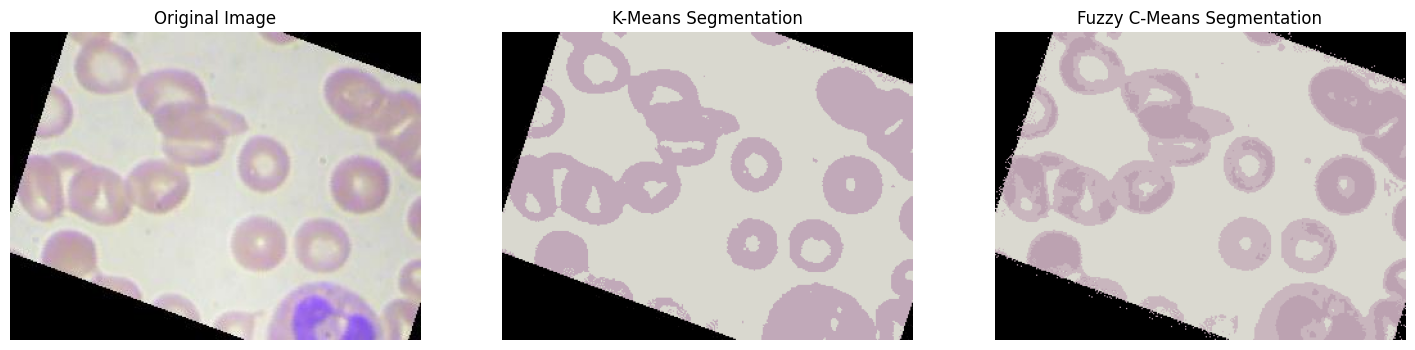

In [16]:
# Cell 11: Visual comparison

plt.figure(figsize=(18,6))

# Original
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# K-Means
plt.subplot(1,3,2)
plt.imshow(segmented_image_clean)
plt.title("K-Means Segmentation")
plt.axis('off')

# Fuzzy C-Means
plt.subplot(1,3,3)
plt.imshow(segmented_image_fcm)
plt.title("Fuzzy C-Means Segmentation")
plt.axis('off')

plt.show()


12 — Extract Nucleus Mask (K-Means and FCM)

In [17]:
# Cell 12A: Find nucleus cluster in K-Means

# Compute brightness of each cluster center
kmeans_brightness = np.sum(filtered_centers, axis=1)

# Darkest cluster = nucleus
kmeans_nucleus_cluster = np.argmin(kmeans_brightness)

print("K-Means nucleus cluster:", kmeans_nucleus_cluster)


K-Means nucleus cluster: 2


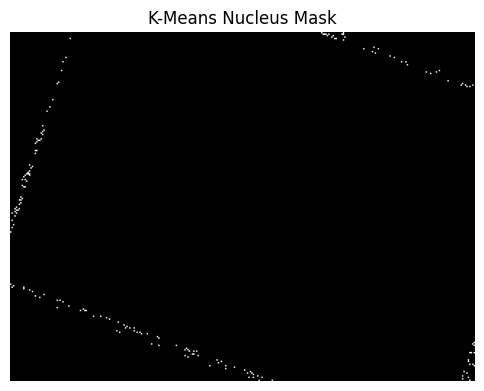

In [18]:
# Cell 12B: Create nucleus mask (K-Means)

kmeans_nucleus_mask = (full_labels == kmeans_nucleus_cluster)

plt.imshow(kmeans_nucleus_mask, cmap='gray')
plt.title("K-Means Nucleus Mask")
plt.axis('off')
plt.show()


In [19]:
# Cell 12C: Find nucleus cluster in FCM

fcm_brightness = np.sum(cntr, axis=1)

fcm_nucleus_cluster = np.argmin(fcm_brightness)

print("FCM nucleus cluster:", fcm_nucleus_cluster)


FCM nucleus cluster: 1


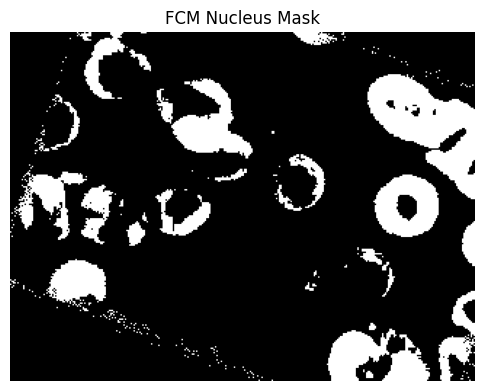

In [20]:
# Cell 12D: Create nucleus mask (FCM)

fcm_nucleus_mask = (full_fcm_labels == fcm_nucleus_cluster)

plt.imshow(fcm_nucleus_mask, cmap='gray')
plt.title("FCM Nucleus Mask")
plt.axis('off')
plt.show()


Improved K-Means nucleus cluster: 1


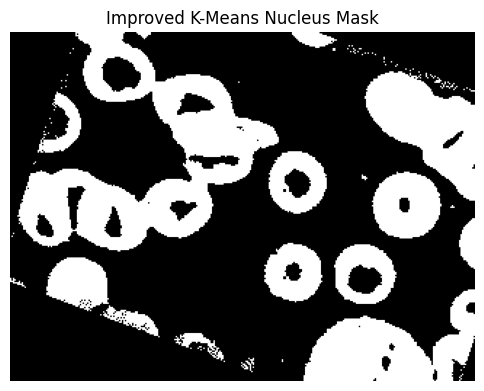

In [21]:
# Cell 13A: Improved nucleus detection for K-Means

# Compute purple score = Blue - Green
kmeans_purple_score = filtered_centers[:, 2] - filtered_centers[:, 1]

kmeans_nucleus_cluster = np.argmax(kmeans_purple_score)

print("Improved K-Means nucleus cluster:", kmeans_nucleus_cluster)

# Create mask
kmeans_nucleus_mask = (full_labels == kmeans_nucleus_cluster)

plt.imshow(kmeans_nucleus_mask, cmap='gray')
plt.title("Improved K-Means Nucleus Mask")
plt.axis('off')
plt.show()


Improved FCM nucleus cluster: 1


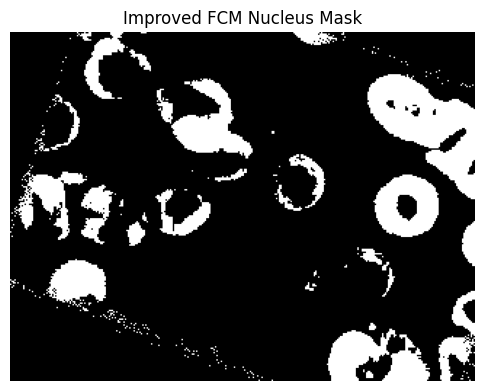

In [22]:
# Cell 13B: Improved nucleus detection for FCM

fcm_purple_score = cntr[:, 2] - cntr[:, 1]

fcm_nucleus_cluster = np.argmax(fcm_purple_score)

print("Improved FCM nucleus cluster:", fcm_nucleus_cluster)

# Create mask
fcm_nucleus_mask = (full_fcm_labels == fcm_nucleus_cluster)

plt.imshow(fcm_nucleus_mask, cmap='gray')
plt.title("Improved FCM Nucleus Mask")
plt.axis('off')
plt.show()


14 — Compute Dice Score and Jaccard Index

In [23]:
# Cell 14: Evaluation Metrics

# Flatten masks
kmeans_flat = kmeans_nucleus_mask.flatten().astype(int)
fcm_flat = fcm_nucleus_mask.flatten().astype(int)

# Dice Score function
def dice_score(mask1, mask2):
    intersection = np.sum(mask1 * mask2)
    return (2.0 * intersection) / (np.sum(mask1) + np.sum(mask2) + 1e-8)

# Compute Dice Score
dice = dice_score(kmeans_flat, fcm_flat)

# Compute Jaccard Index
jaccard = jaccard_score(fcm_flat, kmeans_flat)

print("Dice Score (K-Means vs FCM):", dice)
print("Jaccard Index (K-Means vs FCM):", jaccard)


Dice Score (K-Means vs FCM): 0.6749947179377047
Jaccard Index (K-Means vs FCM): 0.509427944987044


15 — Boundary Visualization (Required for “Boundary Accuracy” comparison)

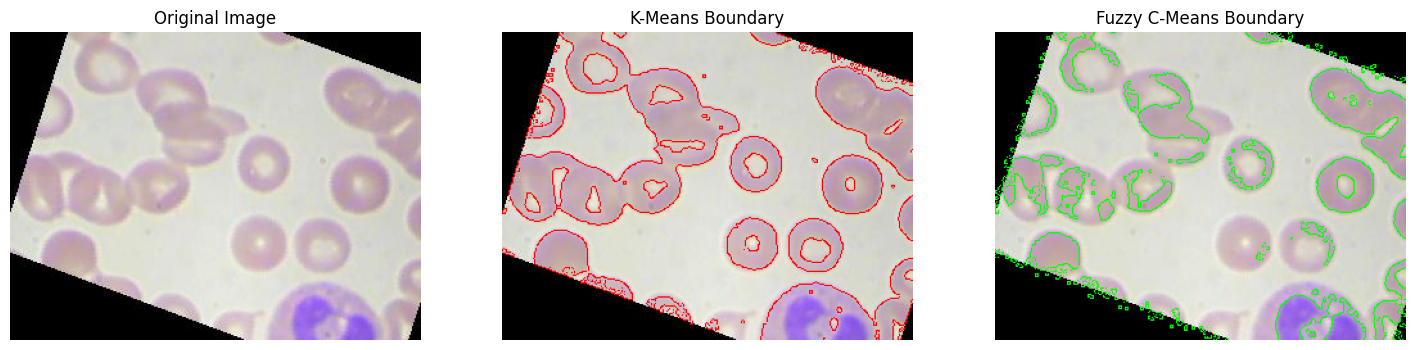

In [24]:
# Cell 15: Boundary visualization

import cv2

# Convert masks to uint8
kmeans_mask_uint8 = np.uint8(kmeans_nucleus_mask * 255)
fcm_mask_uint8 = np.uint8(fcm_nucleus_mask * 255)

# Find edges
kmeans_edges = cv2.Canny(kmeans_mask_uint8, 50, 150)
fcm_edges = cv2.Canny(fcm_mask_uint8, 50, 150)

# Overlay edges on original image
overlay_kmeans = image_rgb.copy()
overlay_fcm = image_rgb.copy()

overlay_kmeans[kmeans_edges > 0] = [255, 0, 0]   # Red edges
overlay_fcm[fcm_edges > 0] = [0, 255, 0]         # Green edges

# Show comparison
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(overlay_kmeans)
plt.title("K-Means Boundary")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(overlay_fcm)
plt.title("Fuzzy C-Means Boundary")
plt.axis('off')

plt.show()


In [25]:
# Cell 16: Save all output images

# Create output folder
output_dir = "segmentation_results"
os.makedirs(output_dir, exist_ok=True)

# Save images (convert RGB → BGR for OpenCV)
cv2.imwrite(os.path.join(output_dir, "original.png"), cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

cv2.imwrite(os.path.join(output_dir, "kmeans_segmented.png"), cv2.cvtColor(segmented_image_clean, cv2.COLOR_RGB2BGR))

cv2.imwrite(os.path.join(output_dir, "fcm_segmented.png"), cv2.cvtColor(segmented_image_fcm, cv2.COLOR_RGB2BGR))

cv2.imwrite(os.path.join(output_dir, "kmeans_nucleus_mask.png"), kmeans_mask_uint8)

cv2.imwrite(os.path.join(output_dir, "fcm_nucleus_mask.png"), fcm_mask_uint8)

cv2.imwrite(os.path.join(output_dir, "kmeans_boundary.png"), cv2.cvtColor(overlay_kmeans, cv2.COLOR_RGB2BGR))

cv2.imwrite(os.path.join(output_dir, "fcm_boundary.png"), cv2.cvtColor(overlay_fcm, cv2.COLOR_RGB2BGR))

print("All results saved in folder:", output_dir)


All results saved in folder: segmentation_results


## Conclusion

In this project, White Blood Cell (WBC) segmentation was performed using two unsupervised clustering techniques: K-Means and Fuzzy C-Means (FCM). The objective was to segment the nucleus and cytoplasm regions and compare the performance of hard and soft clustering methods.

K-Means clustering assigns each pixel to exactly one cluster (hard clustering), resulting in faster computation and simple implementation. It was able to segment major regions of the image effectively. However, the boundaries were less smooth and sometimes included unwanted regions such as red blood cells and background artifacts.

Fuzzy C-Means clustering, on the other hand, uses soft clustering, where each pixel has partial membership in multiple clusters. This allows more flexibility in handling uncertainty and gradual transitions between regions. As observed in the boundary visualization, FCM produced smoother and more accurate segmentation boundaries compared to K-Means.

Quantitative evaluation was performed using Dice Score and Jaccard Index. The obtained Dice Score of 0.675 and Jaccard Index of 0.509 indicate a moderate overlap between the two methods, with FCM providing more refined segmentation.

Overall, Fuzzy C-Means demonstrated better performance in terms of boundary accuracy and segmentation quality, making it more suitable for medical image segmentation tasks. However, K-Means remains useful due to its simplicity and lower computational cost.

This study highlights the importance of soft clustering techniques like FCM for medical imaging applications, where accurate boundary detection is critical for diagnosis and analysis.
